# 习题一

<center><font face="楷书"，size=8>Author:孟群康</font></center>
<center><font face="楷书"，size=8>Student_number:2022202020095</font></center>

## 一、题干

被插函数为$f(x)=\frac{1}{1+x^2}$，插值区间为$[-5,5]$，试对区间$5$等分和$10$等分，进行拉格朗日插值。编写程序并画图

## 二、基本方法

计算出5等分离散取值点：

In [1]:
interval_low = -5
interval_high = 5
interval_num = 5

Discrete_x_point=[]
interval_size = (interval_high-interval_low)/(interval_num-1)
for step in range(interval_num):
    Discrete_x_point.append(interval_low+interval_size*step)
print("making",interval_num,"division from",interval_low,"to",interval_high,"is:")
print(Discrete_x_point)

making 5 division from -5 to 5 is:
[-5.0, -2.5, 0.0, 2.5, 5.0]


计算出对应点的函数值，作为已知离散点进行插值

In [2]:
def origin_function(x):
    return 1.0/(1+x**2)

In [3]:
Discrete_y_point=[]
for item in Discrete_x_point:
    Discrete_y_point.append(origin_function(item))
for i in range(len(Discrete_x_point)):
    print("f(%.4f)=%.4f"%(Discrete_x_point[i],Discrete_y_point[i]),sep='')

f(-5.0000)=0.0385
f(-2.5000)=0.1379
f(0.0000)=1.0000
f(2.5000)=0.1379
f(5.0000)=0.0385


利用5个函数值，可以计算出拉格朗日插值多项式

In [4]:
def P5x(x,y,x_input):
    power0 = y[0]*(x_input-x[1])*(x_input-x[2])*(x_input-x[3])*(x_input-x[4])/((x[0]-x[1])*(x[0]-x[2])*(x[0]-x[3])*(x[0]-x[4]))
    power1 = y[1]*(x_input-x[0])*(x_input-x[2])*(x_input-x[3])*(x_input-x[4])/((x[1]-x[0])*(x[1]-x[2])*(x[1]-x[3])*(x[1]-x[4]))
    power2 = y[2]*(x_input-x[0])*(x_input-x[1])*(x_input-x[3])*(x_input-x[4])/((x[2]-x[0])*(x[2]-x[1])*(x[2]-x[3])*(x[2]-x[4]))
    power3 = y[3]*(x_input-x[0])*(x_input-x[1])*(x_input-x[2])*(x_input-x[4])/((x[3]-x[0])*(x[3]-x[1])*(x[3]-x[2])*(x[3]-x[4]))
    power4 = y[4]*(x_input-x[0])*(x_input-x[1])*(x_input-x[2])*(x_input-x[3])/((x[4]-x[0])*(x[4]-x[1])*(x[4]-x[2])*(x[4]-x[3]))
    return power0+power1+power2+power3+power4

拉格朗日插值多项式示意图如下：

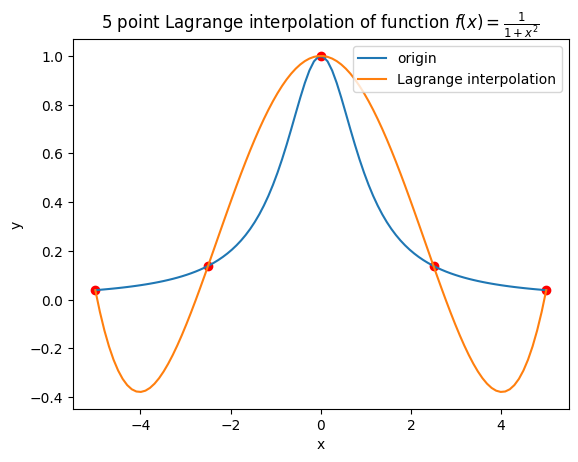

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
y = origin_function(x)
y_= P5x(Discrete_x_point,Discrete_y_point,x)



plt.plot(x,y,label = 'origin')
plt.plot(x,y_,label = 'Lagrange interpolation')
plt.scatter(Discrete_x_point,Discrete_y_point,color = 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$5$ point Lagrange interpolation of function $f(x)=\frac{1}{1+x^2}$")
plt.legend(loc = 'upper right')
plt.show()

拉格朗日插值函数的解析式为：

In [6]:
import sympy as sp
x = sp.symbols('x')
print("Lagrange interpolation of function is f(x)=")
sp.simplify(P5x(Discrete_x_point,Discrete_y_point,x))

Lagrange interpolation of function is f(x)=


0.00530503978779841*x**4 - 0.171087533156499*x**2 + 1.0

对于10分点的插值，同样先计算出对应的x和y的值

In [7]:
interval_low = -5
interval_high = 5
interval_num = 10

Discrete_x_point=[]
interval_size = (interval_high-interval_low)/(interval_num-1)
for step in range(interval_num):
    Discrete_x_point.append(interval_low+interval_size*step)
print("making",interval_num,"division from",interval_low,"to",interval_high,"is:")
print(Discrete_x_point)

making 10 division from -5 to 5 is:
[-5.0, -3.888888888888889, -2.7777777777777777, -1.6666666666666665, -0.5555555555555554, 0.5555555555555554, 1.666666666666667, 2.7777777777777786, 3.8888888888888893, 5.0]


In [8]:
Discrete_y_point=[]
for item in Discrete_x_point:
    Discrete_y_point.append(origin_function(item))
for i in range(len(Discrete_x_point)):
    print("f(%.4f)=%.4f"%(Discrete_x_point[i],Discrete_y_point[i]),sep='')

f(-5.0000)=0.0385
f(-3.8889)=0.0620
f(-2.7778)=0.1147
f(-1.6667)=0.2647
f(-0.5556)=0.7642
f(0.5556)=0.7642
f(1.6667)=0.2647
f(2.7778)=0.1147
f(3.8889)=0.0620
f(5.0000)=0.0385


由于10个点的插值函数直接书写过于复杂，因此采用循环公式进行，写出任意分点的插值函数公式：

In [9]:
def Pnx(x,y,x_input):
    if(len(x)!=len(y)):
        raise Exception("len x and len y is NOT EQUAL!")
    Power=0
    for i in range(len(x)):
        multi_item=1
        div_item=1
        for j in range(len(x)):
            multi_item *= (1 if(j==i) else (x_input-x[j]))
            div_item *= (1 if(j==i) else(x[i]-x[j]))
        power = y[i]*multi_item/div_item
        Power+=power

    return Power

拉格朗日插值多项式示意图如下：

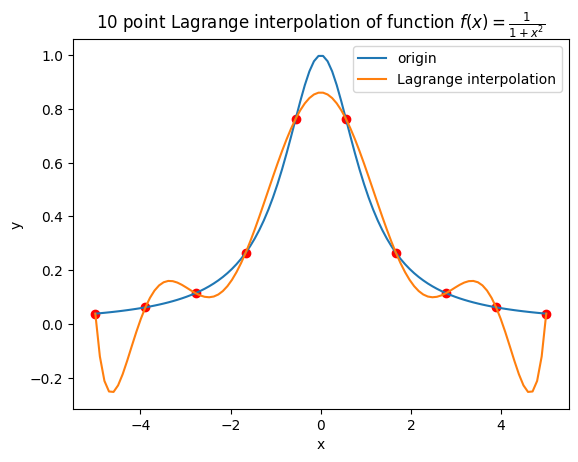

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
y = origin_function(x)
y_= Pnx(Discrete_x_point,Discrete_y_point,x)



plt.plot(x,y,label = 'origin')
plt.plot(x,y_,label = 'Lagrange interpolation')
plt.scatter(Discrete_x_point,Discrete_y_point,color = 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$10$ point Lagrange interpolation of function $f(x)=\frac{1}{1+x^2}$")
plt.legend(loc = 'upper right')
plt.show()

拉格朗日插值函数解析式如下：

In [11]:
import sympy as sp
x = sp.symbols('x')
print("Lagrange interpolation of function is f(x)=")
sp.simplify(Pnx(Discrete_x_point,Discrete_y_point,x))

Lagrange interpolation of function is f(x)=


2.71050543121376e-20*x**9 + 5.53594233693163e-5*x**8 + 8.67361737988404e-19*x**7 - 0.00287458931717709*x**6 - 1.38777878078145e-17*x**5 + 0.0491656480673539*x**4 + 5.55111512312578e-17*x**3 - 0.330436933133909*x**2 - 1.11022302462516e-16*x + 0.861538151965819

## 三、任意数量插值计算和画图

生成n个已知数值点：

In [12]:
def num_gen(interval_low = -5,interval_high = 5,interval_num = 5):
    Discrete_x_point=[]
    Discrete_y_point=[]
    interval_size = (interval_high-interval_low)/(interval_num-1)
    for step in range(interval_num):
        Discrete_x_point.append(interval_low+interval_size*step)
#     print("making",interval_num,"division from",interval_low,"to",interval_high,"is:")
#     print(Discrete_x_point)
    for item in Discrete_x_point:
        Discrete_y_point.append(origin_function(item))
#     for i in range(len(Discrete_x_point)):
#         print("f(%.4f)=%.4f"%(Discrete_x_point[i],Discrete_y_point[i]),sep='')
    return Discrete_x_point,Discrete_y_point

从插值2-11的所有结果画出：

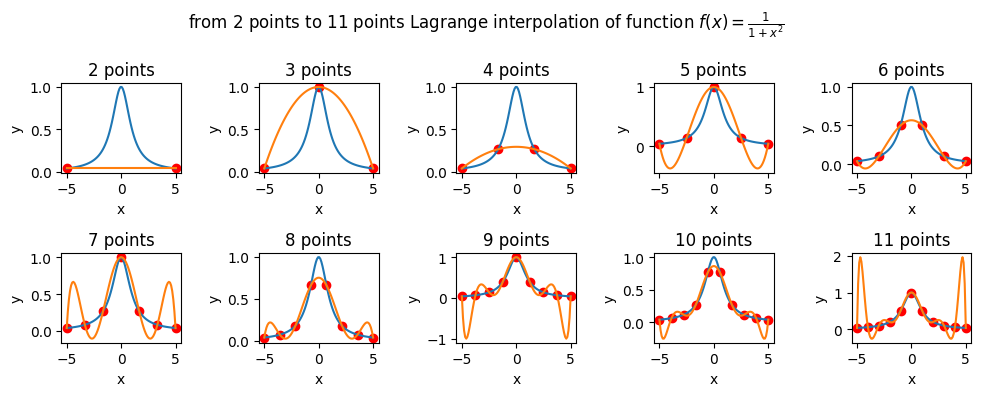

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
y = origin_function(x)

x_div_point=[]
y_div_point=[]
for i in range(2,12):
    Discrete_x_point,Discrete_y_point = num_gen(interval_num=i)
    x_div_point.append(Discrete_x_point)
    y_div_point.append(Discrete_y_point)




plt.figure(figsize=(10, 4))

for i in range(2):
    for j in range(5):
        num = i*5+j
        plt.subplot(2,5,num+1)
        plt.plot(x,y,label = 'origin')
        
        plt.plot(x,Pnx(x_div_point[num],y_div_point[num],x),label = 'Lagrange interpolation')
        
        plt.scatter(x_div_point[num],y_div_point[num],color = 'red')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(r"%d points"%(num+2))
#         plt.legend(loc = 'upper right')
# plt.tight_layout(pad=0.5, w_pad=50.0, h_pad=10.0)

plt.suptitle(r"from 2 points to 11 points Lagrange interpolation of function $f(x)=\frac{1}{1+x^2}$")
plt.tight_layout()
plt.show()